In [5]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('emotion_kaggle.csv') 
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

In [8]:
fold_no = 1
for train_index, test_index in skf.split(df, df['Emotion']):
    train = df.loc[train_index,:]
    test = df.loc[test_index,:]
    fold_no += 1

In [4]:
import texthero as hero

In [9]:
train['clean_text'] = hero.clean(train['Text'])

In [10]:
train['tfidf_clean_text'] = hero.tfidf(train['clean_text'])

In [11]:
train['pca_tfidf_clean_text'] = hero.pca(train['tfidf_clean_text'])

In [12]:
hero.scatterplot(train, col='pca_tfidf_clean_text', color='Emotion', title="Feelings")

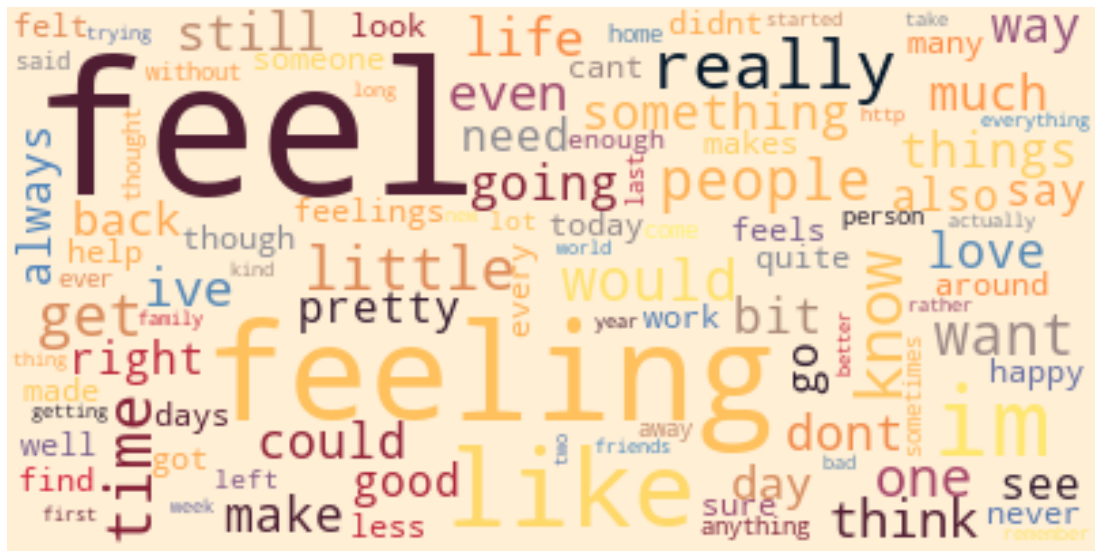

In [13]:
hero.wordcloud(train.clean_text, max_words=100)

In [29]:
NUM_TOP_WORDS = 10
train.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

Emotion              
anger     even            93
          think           85
          angry           85
          way             83
          things          76
          bit             73
          could           73
          resentful       70
          dont            67
          something       67
fear      bit            109
          anxious        100
          still           84
          nervous         81
          terrified       72
          strange         70
          think           68
          going           67
          afraid          66
          frightened      65
happy     make           207
          good           191
          something      183
          love           175
          even           172
          think          171
          pretty         171
          life           169
          much           169
          happy          164
love      love            85
          loving          65
          caring          57
          hot        

In [124]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel","like","feeling","im","really","know","people","get","time","want","little","one","would","think"]))
train['clean_text'] = hero.remove_stopwords(train['clean_text'], custom_stopwords)

In [125]:
import fasttext

In [126]:
df_train = pd.DataFrame(data= np.c_[train['Text'], train['Emotion']], columns= ['Text','Emotion'])
df_test = pd.DataFrame(data= np.c_[test['Text'], test['Emotion']], columns= ['Text','Emotion'])

In [128]:
df_train['clean_text'] = hero.clean(df_train['Text'])
df_test['clean_text'] = hero.clean(df_test['Text'])
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["feel","like","feeling","im","really","know","people","get","time","want","little","one","would", "think"]))

df_train['clean_text'] = hero.remove_stopwords(df_train['clean_text'], custom_stopwords)
df_test['clean_text'] = hero.remove_stopwords(df_test['clean_text'], custom_stopwords)

In [37]:
df_train

,Text,Emotion,clean_text
0,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post greedy wrong
1,i am feeling grouchy,anger,grouchy
2,ive been taking or milligrams or times recomme...,surprise,ive taking milligrams times recommended amount...
3,i feel as confused about life as a teenager or...,fear,confused life teenager jaded year old man
4,i feel romantic too,love,romantic
...,...,...,...
16090,Cleo stared at the contents with dism,fear,cleo stared contents dism
16091,Melissa stared at her friend in dism,fear,melissa stared friend dism
16092,Successive state elections have seen the gover...,fear,successive state elections seen governing part...
16093,Vincent was irritated but not dismay,fear,vincent irritated dismay


In [129]:
# je remplace ma colonne target numérique par son label 

df_train["Emotion"] = df_train[["Emotion"]].apply(lambda x: '__label__' + x)

# je fais pareil pour le jeu de test

df_test["Emotion"] = df_test[["Emotion"]].apply(lambda x: '__label__' + x)

In [41]:
df_train

,Text,Emotion,clean_text
0,im grabbing a minute to post i feel greedy wrong,__label__anger,grabbing minute post greedy wrong
1,i am feeling grouchy,__label__anger,grouchy
2,ive been taking or milligrams or times recomme...,__label__surprise,ive taking milligrams times recommended amount...
3,i feel as confused about life as a teenager or...,__label__fear,confused life teenager jaded year old man
4,i feel romantic too,__label__love,romantic
...,...,...,...
16090,Cleo stared at the contents with dism,__label__fear,cleo stared contents dism
16091,Melissa stared at her friend in dism,__label__fear,melissa stared friend dism
16092,Successive state elections have seen the gover...,__label__fear,successive state elections seen governing part...
16093,Vincent was irritated but not dismay,__label__fear,vincent irritated dismay


In [130]:
# Saving the CSV file as a text file to train/test the classifier
import csv
df_train[['Emotion', 'clean_text']].to_csv('train.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")
df_test[['Emotion', 'clean_text']].to_csv('test.txt', index = False, sep = ' ', header = None,quoting = csv.QUOTE_NONE, quotechar = "", escapechar = " ")

In [216]:
model = fasttext.train_supervised('train.txt', wordNgrams = 1, epoch=6, loss="ova")

In [217]:
model.test('test.txt')  

(5364, 0.8857196122296793, 0.8857196122296793)

In [203]:
model.save_model("model_8857.ftz")